In [1]:
#Импортируем основные библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv")

In [3]:
train_data = train_data.drop(['ID'], axis=1)
test_data = test_data.drop(['ID'], axis=1)

#EDA тренировочных данных и предобработка

In [4]:
#Вывод первых 5 строк
train_data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [5]:
#Вывод названий столбцов
train_data.columns

Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [6]:
#Посмотрим размерность датасета
train_data.shape

(600000, 14)

In [7]:
#Посмотрим подробную информацию
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   600000 non-null  float64
 1   sex                                   600000 non-null  int64  
 2   chest                                 600000 non-null  float64
 3   resting_blood_pressure                600000 non-null  float64
 4   serum_cholestoral                     600000 non-null  float64
 5   fasting_blood_sugar                   600000 non-null  int64  
 6   resting_electrocardiographic_results  600000 non-null  int64  
 7   maximum_heart_rate_achieved           600000 non-null  float64
 8   exercise_induced_angina               600000 non-null  int64  
 9   oldpeak                               600000 non-null  float64
 10  slope                                 600000 non-null  int64  
 11  

In [8]:
#Проверим наличие пропусков. Пропусков нет
train_data.isnull().sum()

,0
age,0
sex,0
chest,0
resting_blood_pressure,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_electrocardiographic_results,0
maximum_heart_rate_achieved,0
exercise_induced_angina,0
oldpeak,0


In [9]:
#Посмотрим основные статистики
train_data.describe(include='all')

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


In [10]:
#Посмотрим уникальные значения
train_data.nunique()

,0
age,594106
sex,2
chest,133009
resting_blood_pressure,596241
serum_cholestoral,598797
fasting_blood_sugar,2
resting_electrocardiographic_results,3
maximum_heart_rate_achieved,597583
exercise_induced_angina,2
oldpeak,384255


In [11]:
#Проверим на наличие дубликатов. В тренировочном датасете нет дубликатов
train_data.duplicated().sum()

np.int64(0)

In [12]:
#Поделим признаки на категориальные и числовые
cat_train_data=['sex','fasting_blood_sugar','resting_electrocardiographic_results','exercise_induced_angina','slope','number_of_major_vessels','thal']
num_train_data=['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak']


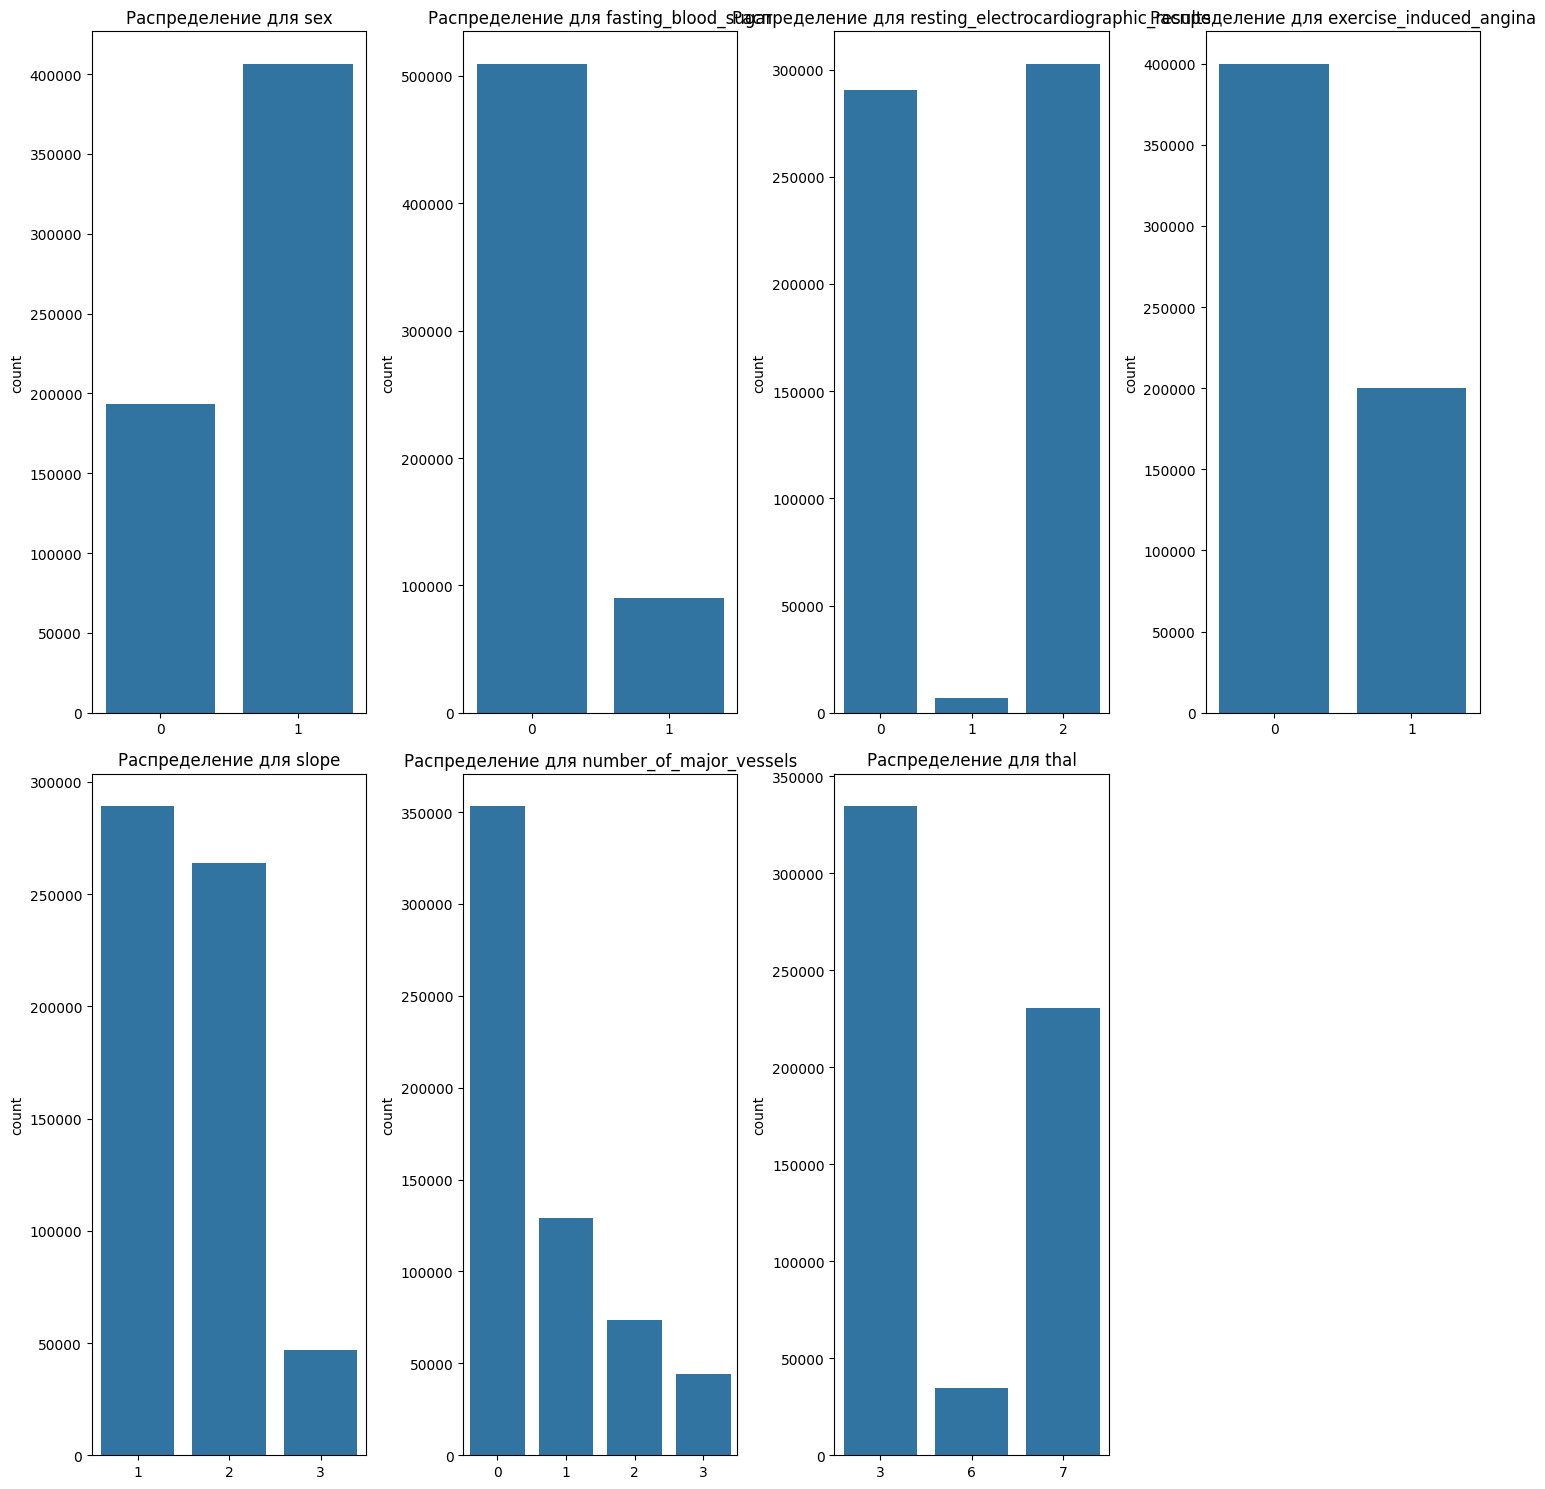

In [13]:
#Посмотрим на распределение категориальных признаков
fig, axes=plt.subplots(nrows=2, ncols=4, figsize=(15,15)) #Построим фигуру
axes = axes.flatten() # Преобразуем axes в плоский массив для удобного перебора
for i, col in enumerate(cat_train_data):
  sns.countplot(x=col, data=train_data, ax=axes[i])
  axes[i].set_title(f'Распределение для {col}')
  axes[i].set_xlabel('')
for ax in axes[-1:]: #Удалим последние ненужные графики
    ax.remove()
plt.tight_layout()
plt.show()

In [14]:
#Применим One-Hot-Encoding для категориальных признаков
from sklearn.preprocessing import OneHotEncoder
data_encoded = pd.get_dummies(train_data, columns=cat_train_data, drop_first=True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     600000 non-null  float64
 1   chest                                   600000 non-null  float64
 2   resting_blood_pressure                  600000 non-null  float64
 3   serum_cholestoral                       600000 non-null  float64
 4   maximum_heart_rate_achieved             600000 non-null  float64
 5   oldpeak                                 600000 non-null  float64
 6   class                                   600000 non-null  int64  
 7   sex_1                                   600000 non-null  bool   
 8   fasting_blood_sugar_1                   600000 non-null  bool   
 9   resting_electrocardiographic_results_1  600000 non-null  bool   
 10  resting_electrocardiographic_results_2  6000

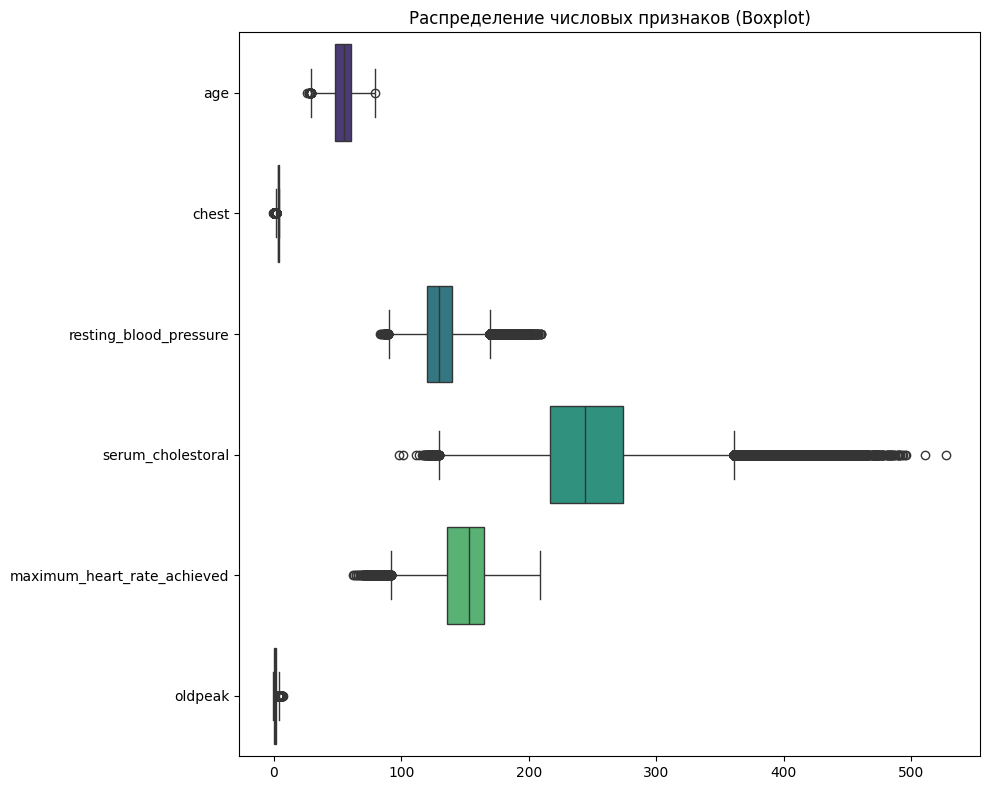

In [15]:
#Посмотрим на распределение числовых признаков. Имеются выбросы
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_encoded[num_train_data], orient='h', palette='viridis')
plt.title('Распределение числовых признаков (Boxplot)')
plt.tight_layout()
plt.show()

In [16]:
#Применим метод межквартильного размаха. Для этого напишем функцию, которая возвращает потенциальные выбросы и очищенный датасет
def outliers_cols(data: pd.DataFrame, columns:list)->tuple:
    """
    Определяет потенциальные выбросы в признаке на основе межквартильного размаха.

    Параметры
    ----------
    data : DataFrame
        Датасет.
    columns : list
        Список столбцов.

    Возвращает
    -------
    DataFrame с выбросами.
    DataFrame с очищенными данными.
    """
    mask = pd.Series(False, index=data.index) #Создадим маску, изначаль все False
    for col in columns: #Перебираем каждый столбец
        if col in data.columns: #Если этот столбце имеется в данных, то x- все значения этого столбца
            x = data[col]
            quartile_25, quartile_75=x.quantile(0.25), x.quantile(0.75) #Вычислим 25-ый и 75-ый квантил
            iqr=quartile_75-quartile_25 #Вычислим межквартильное расстояние
            lower_bound = quartile_25 - (iqr * 1.5) #Вычислим нижнюю и верхнюю границы Тьюки
            upper_bound = quartile_75 + (iqr * 1.5)
            mask |= ((x < lower_bound) | (x > upper_bound)) #маска для фильтрации
    outliers = data[mask] #Найдем наблюдения, которые выходят за пределы верхних и нижних границ
    clean_data_train = data[~mask] #Найдем набблюдения с помощью инверсии маски
    return outliers, clean_data_train

In [17]:
outliers, clean_data_train=outliers_cols(data_encoded, num_train_data) #Применим нашу функцию к интересующим в датасете столбцам
print(f"Найдено выбросов: {outliers.shape[0]}") #Вывод покажем в численном виде

Найдено выбросов: 101345


In [18]:
print(f"Очищенный датасет: {clean_data_train.shape[0]}")

Очищенный датасет: 498655


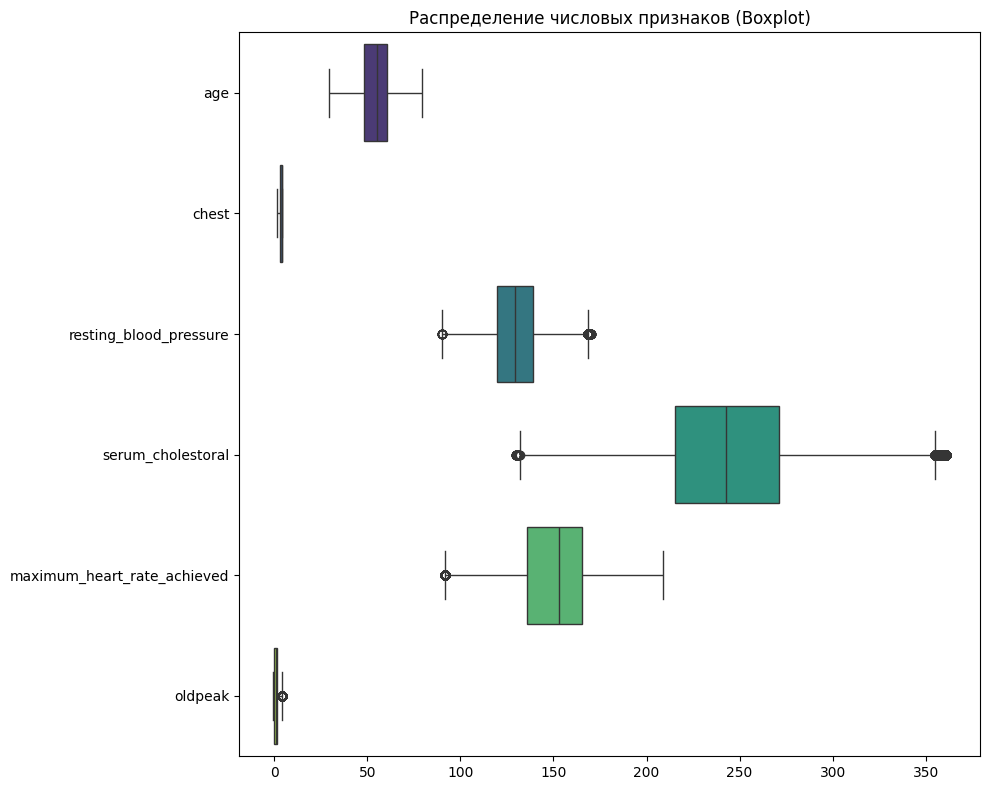

In [19]:
#Посмотрим на распределение числовых признаков после очистки аномальных значений. После очистки выбросов стало меньше!
plt.figure(figsize=(10, 8))
sns.boxplot(data=clean_data_train[num_train_data], orient='h', palette='viridis')
plt.title('Распределение числовых признаков (Boxplot)')
plt.tight_layout()
plt.show()

In [20]:
clean_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498655 entries, 0 to 599998
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     498655 non-null  float64
 1   chest                                   498655 non-null  float64
 2   resting_blood_pressure                  498655 non-null  float64
 3   serum_cholestoral                       498655 non-null  float64
 4   maximum_heart_rate_achieved             498655 non-null  float64
 5   oldpeak                                 498655 non-null  float64
 6   class                                   498655 non-null  int64  
 7   sex_1                                   498655 non-null  bool   
 8   fasting_blood_sugar_1                   498655 non-null  bool   
 9   resting_electrocardiographic_results_1  498655 non-null  bool   
 10  resting_electrocardiographic_results_2  498655 no

In [21]:
#В переменную Х запишем наши признаки, которые будем использовать для предсказания. В перемнную у запишем нашу целевую перменную, которую будем предсказывать
train_X=clean_data_train.drop(['class'],axis=1)
train_y=clean_data_train['class']

In [22]:
#Стандартизируем числовые данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled=scaler.fit_transform(train_X[num_train_data]) #Обучим и сразу применим стандартизацию к числовым переменным

In [23]:
#Соберем все в единный датасет с категориальными закодированными и стандартизированными числовыми данными и не забудем целевую переменную
train_X_final = pd.concat([
    pd.DataFrame(train_X_scaled, columns=num_train_data, index=train_X.index),
    train_X.drop(num_train_data, axis=1),
    train_y.rename('class')], axis=1) #Сторого будем объединять по индексам, т.к через join терялись данные
train_X_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498655 entries, 0 to 599998
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     498655 non-null  float64
 1   chest                                   498655 non-null  float64
 2   resting_blood_pressure                  498655 non-null  float64
 3   serum_cholestoral                       498655 non-null  float64
 4   maximum_heart_rate_achieved             498655 non-null  float64
 5   oldpeak                                 498655 non-null  float64
 6   sex_1                                   498655 non-null  bool   
 7   fasting_blood_sugar_1                   498655 non-null  bool   
 8   resting_electrocardiographic_results_1  498655 non-null  bool   
 9   resting_electrocardiographic_results_2  498655 non-null  bool   
 10  exercise_induced_angina_1               498655 no

In [24]:
#Проверим все ли на месте
print(len(train_X_final), len(train_y))
print("Числовые признаки (первые 2 строки):")
print(train_X_final[num_train_data].head(2))

print("\nКатегориальные признаки (пример):")
print(train_X_final[['sex_1', 'slope_2']].head(2))

print("\nЦелевая переменная:")
print(train_X_final['class'].value_counts())

498655 498655
Числовые признаки (первые 2 строки):
        age     chest  resting_blood_pressure  serum_cholestoral  \
0 -0.575828  0.859731                2.097974          -1.425315   
1 -0.088847 -2.061428                0.032142           0.736411   

   maximum_heart_rate_achieved   oldpeak  
0                    -0.069425 -0.055708  
1                     0.137316 -0.831564  

Категориальные признаки (пример):
   sex_1  slope_2
0  False     True
1   True     True

Целевая переменная:
class
0    274185
1    224470
Name: count, dtype: int64


In [25]:
# train_X_final- наш итоговый датасет с тренировочным набором данных

In [26]:
#Посмотрим на матрицу корреляций числовых признаков в тренировочном наборе данных
train_numeric_colls=['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak'] #Для простоты выделим все числовые признаки
corr_matrix_num=train_X_final[train_numeric_colls].corr() #Посчитаем матрицу корреляций
corr_matrix_num

,age,chest,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak
age,1.000000,0.096005,0.022909,0.028829,-0.305777,0.084729
chest,0.096005,1.000000,0.046525,0.053107,-0.159871,0.168461
resting_blood_pressure,0.022909,0.046525,1.000000,0.014432,-0.041408,0.042069
serum_cholestoral,0.028829,0.053107,0.014432,1.000000,-0.047216,0.048424
maximum_heart_rate_achieved,-0.305777,-0.159871,-0.041408,-0.047216,1.000000,-0.143356
oldpeak,0.084729,0.168461,0.042069,0.048424,-0.143356,1.000000


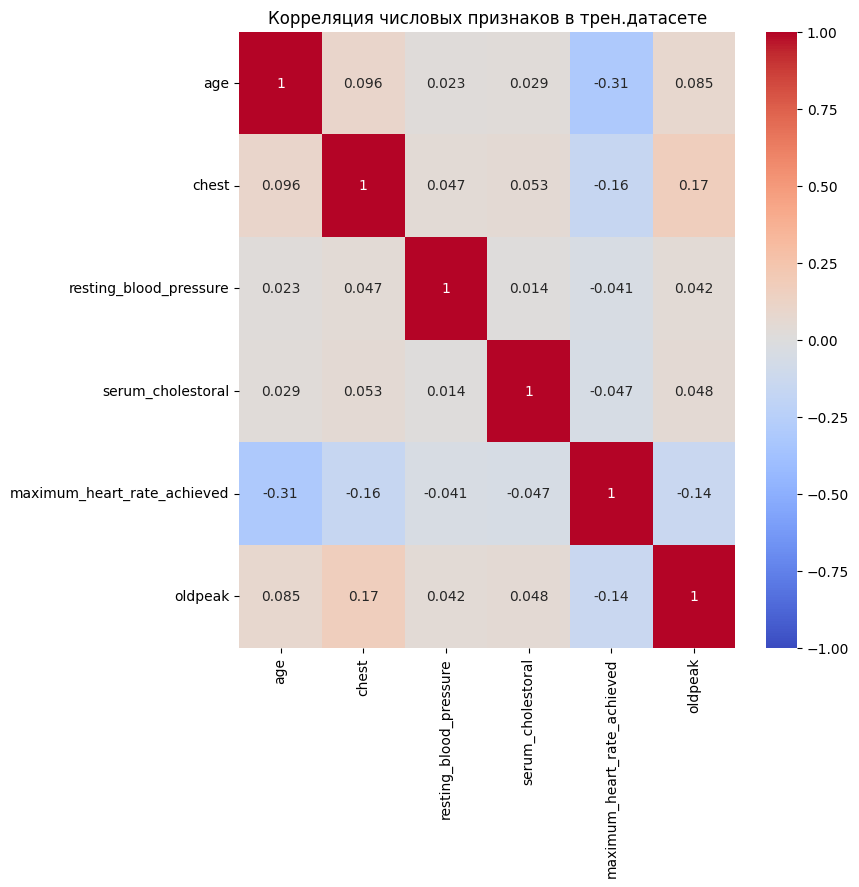

In [27]:
#Визуализируем матрицу корреляций с помощью тепловой карты. Максимальная корреляция наблюдается между chest и oldpeak(боль в груди коррелирует с депрессией сегмента ST). Мультиколлинеарных признаков нет!
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix_num, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция числовых признаков в трен.датасете')
plt.show()

In [28]:
#Посмотрим корреляцию между числовыми признаками и целевой категориальной переменной
from scipy.stats import pointbiserialr #Импорт функции для расчета точечно-бисериальной корреляции
corr_results = {} #Создадим словарь, куда будем добавлять результаты корреляции
for col in train_numeric_colls: #Перебираем все числовые колонки
    corr, p_value = pointbiserialr(train_X_final[col], train_X_final['class']) #Посчитаем коэффициент корреляции и р-значение
    corr_results[col] = {'correlation': corr, 'p-value': p_value}

In [29]:
corr_results #Наиболее коррелируемые с целевой переменной признаки: chest и oldpeak. Боль в груди и депрессия сегмента ST чаще ассоциированы с наличием у пациента сердечно-сосудистых заболеваний

{'age': {'correlation': np.float64(0.2222418836312245),
  'p-value': np.float64(0.0)},
 'chest': {'correlation': np.float64(0.43558206373010905),
  'p-value': np.float64(0.0)},
 'resting_blood_pressure': {'correlation': np.float64(0.10524917058935655),
  'p-value': np.float64(0.0)},
 'serum_cholestoral': {'correlation': np.float64(0.12538282347901203),
  'p-value': np.float64(0.0)},
 'maximum_heart_rate_achieved': {'correlation': np.float64(-0.369161812384286),
  'p-value': np.float64(0.0)},
 'oldpeak': {'correlation': np.float64(0.3873016655274578),
  'p-value': np.float64(0.0)}}

#EDA тестовых данных и предобработка

In [30]:
#Вывод первых 5 строк
test_data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [31]:
#Посмотрим названия столбцов в датасете
test_data.columns

Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal'],
      dtype='object')

In [32]:
#Проверим размерность датасета
test_data.shape

(400000, 13)

In [33]:
#Посмотрим побдробнее информацию о датасете
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   400000 non-null  float64
 1   sex                                   400000 non-null  int64  
 2   chest                                 400000 non-null  float64
 3   resting_blood_pressure                400000 non-null  float64
 4   serum_cholestoral                     400000 non-null  float64
 5   fasting_blood_sugar                   400000 non-null  int64  
 6   resting_electrocardiographic_results  400000 non-null  int64  
 7   maximum_heart_rate_achieved           400000 non-null  float64
 8   exercise_induced_angina               400000 non-null  int64  
 9   oldpeak                               400000 non-null  float64
 10  slope                                 400000 non-null  int64  
 11  

In [34]:
#Проверим наличие пропусков. Пропусков нет
test_data.isnull().sum()

,0
age,0
sex,0
chest,0
resting_blood_pressure,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_electrocardiographic_results,0
maximum_heart_rate_achieved,0
exercise_induced_angina,0
oldpeak,0


In [35]:
#Посмотрим основные статистики
test_data.describe(include='all')

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000
mean,54.406917,0.676858,3.169252,131.369647,249.593475,0.151163,1.025295,149.659088,0.333085,1.050086,1.595072,0.681432,4.70715
std,9.101044,0.467677,0.950585,17.862279,51.720531,0.358208,0.994132,23.065911,0.471317,1.140986,0.628361,0.950323,1.93353
min,27.496874,0.000000,-0.337469,85.830892,94.958220,0.000000,0.000000,58.964662,0.000000,-0.601414,1.000000,0.000000,3.00000
25%,48.021226,0.000000,3.000000,119.942167,216.455450,0.000000,0.000000,135.818008,0.000000,0.000000,1.000000,0.000000,3.00000
50%,55.130138,1.000000,3.000000,129.735888,244.273212,0.000000,2.000000,153.337116,0.000000,0.816276,2.000000,0.000000,3.00000
75%,60.667833,1.000000,4.000000,139.935499,274.357993,0.000000,2.000000,165.216643,1.000000,1.671519,2.000000,1.000000,7.00000
max,80.751628,1.000000,4.000000,212.300808,527.712687,1.000000,2.000000,207.412021,1.000000,6.856219,3.000000,3.000000,7.00000


In [36]:
#Посмотрим уникальные значения
test_data.nunique()

,0
age,397391
sex,2
chest,90257
resting_blood_pressure,398274
serum_cholestoral,399436
fasting_blood_sugar,2
resting_electrocardiographic_results,3
maximum_heart_rate_achieved,398888
exercise_induced_angina,2
oldpeak,262462


In [37]:
#Проверим на наличие дубликатов. В тестовом датасете нет дубликатов
test_data.duplicated().sum()

np.int64(0)

In [38]:
#Поделим признаки на категориальные и числовые
cat_test_data=['sex','fasting_blood_sugar','resting_electrocardiographic_results','exercise_induced_angina','slope','number_of_major_vessels','thal']
num_test_data=['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak']

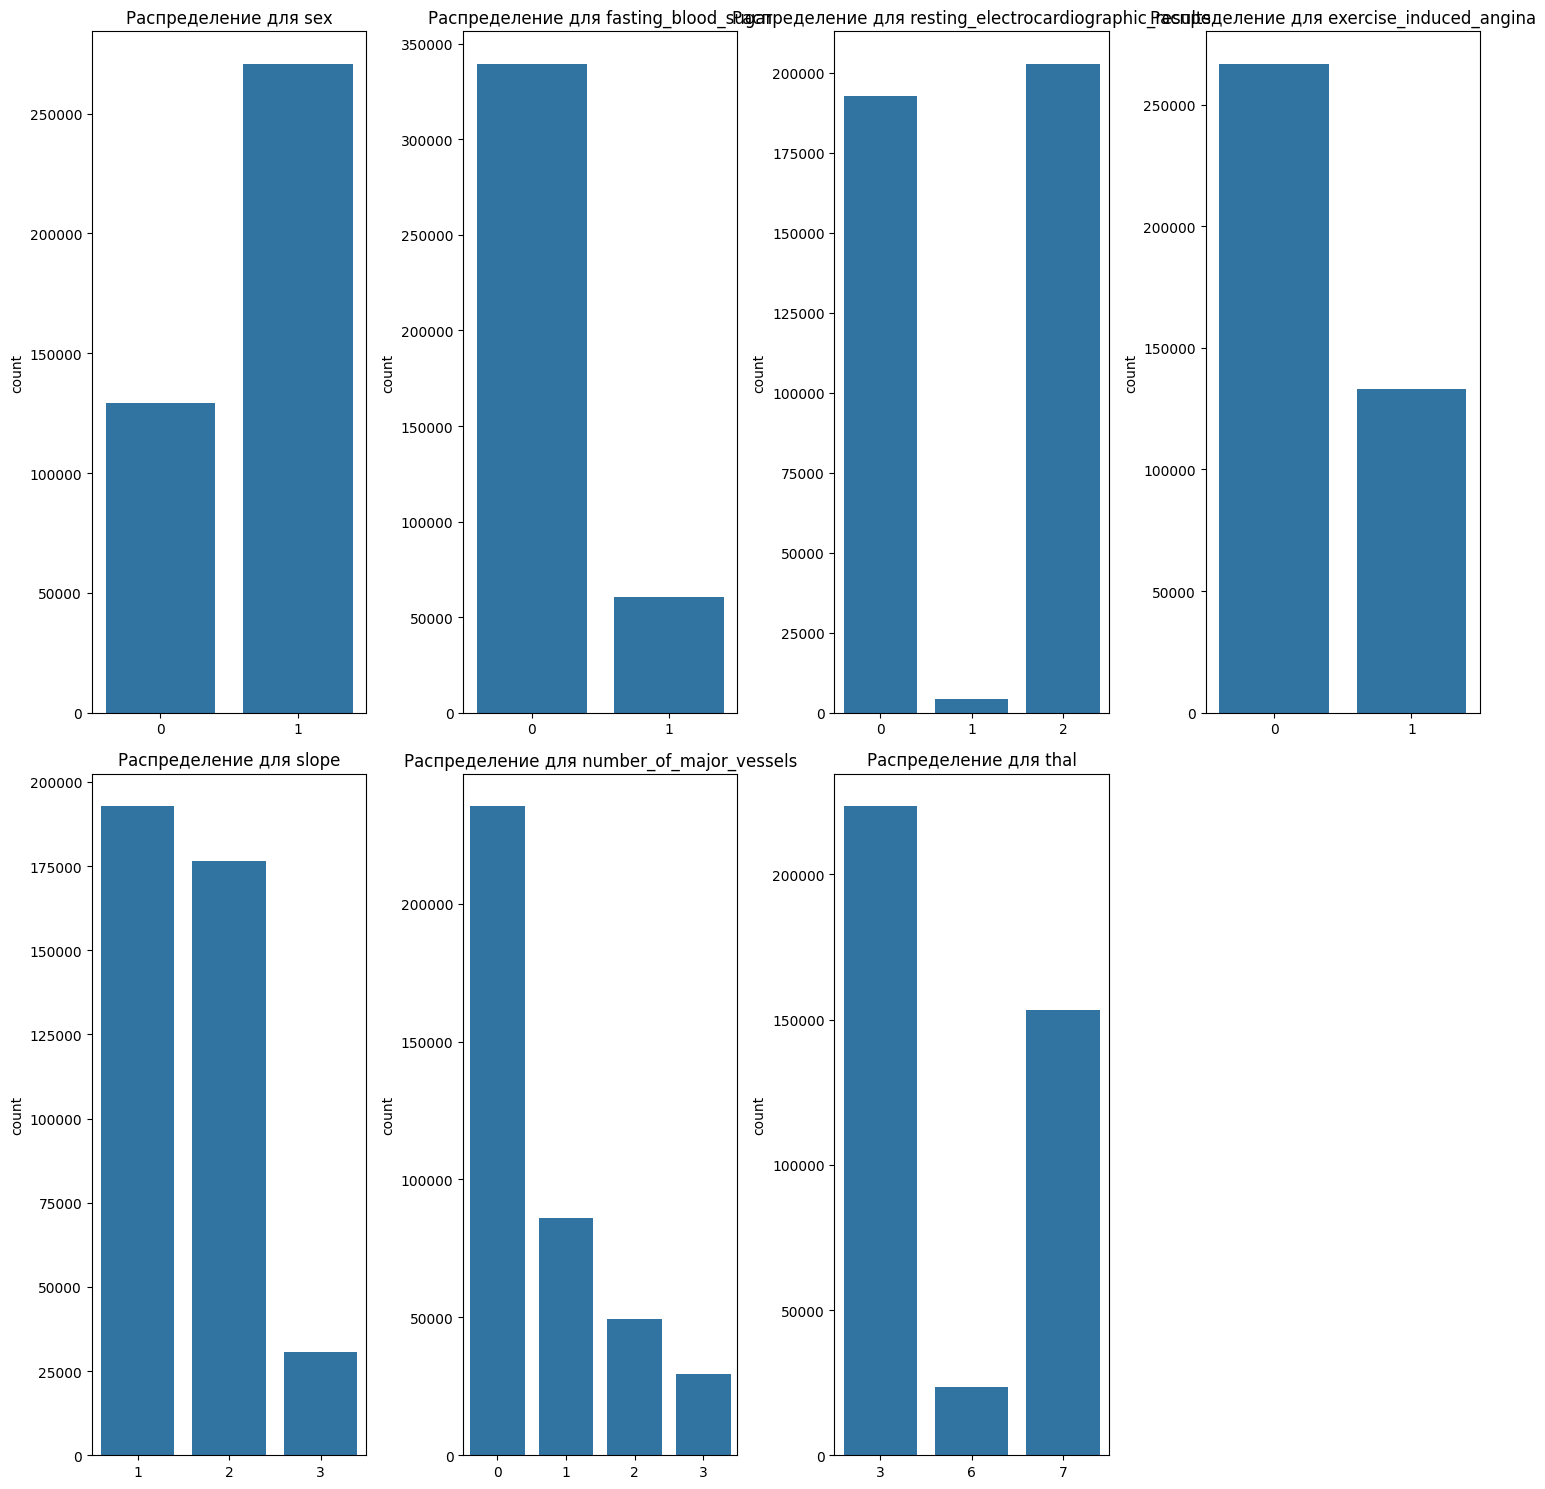

In [39]:
#Посмотрим на распределение категориальных признаков
fig, axes=plt.subplots(nrows=2, ncols=4, figsize=(15,15)) #Построим фигуру
axes = axes.flatten() # Преобразуем axes в плоский массив для удобного перебора
for i, col in enumerate(cat_test_data):
  sns.countplot(x=col, data=test_data, ax=axes[i])
  axes[i].set_title(f'Распределение для {col}')
  axes[i].set_xlabel('')
for ax in axes[-1:]: #Удалим последний ненужный график
    ax.remove()
plt.tight_layout()
plt.show()

In [40]:
#Применим One-Hot-Encoding для категориальных признаков
from sklearn.preprocessing import OneHotEncoder
data_encoded_test = pd.get_dummies(test_data, columns=cat_test_data, drop_first=True)
data_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     400000 non-null  float64
 1   chest                                   400000 non-null  float64
 2   resting_blood_pressure                  400000 non-null  float64
 3   serum_cholestoral                       400000 non-null  float64
 4   maximum_heart_rate_achieved             400000 non-null  float64
 5   oldpeak                                 400000 non-null  float64
 6   sex_1                                   400000 non-null  bool   
 7   fasting_blood_sugar_1                   400000 non-null  bool   
 8   resting_electrocardiographic_results_1  400000 non-null  bool   
 9   resting_electrocardiographic_results_2  400000 non-null  bool   
 10  exercise_induced_angina_1               4000

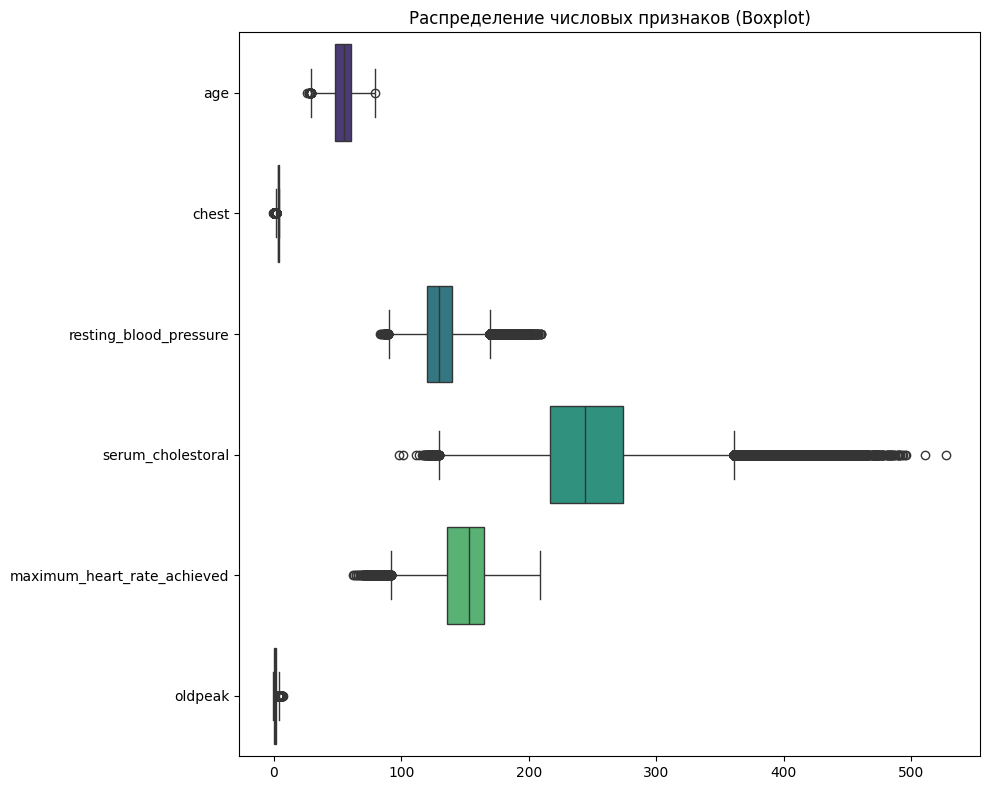

In [41]:
#Посмотрим на распределение числовых признаков. Имеются выбросы
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_encoded[num_test_data], orient='h', palette='viridis')
plt.title('Распределение числовых признаков (Boxplot)')
plt.tight_layout()
plt.show()

In [42]:
#Стандартизируем числовые данные
test_X_scaled = scaler.transform(test_data[num_test_data])

In [43]:
#Сформируем датасет из стандартизированных числовых и кодированных категориальных переменных
test_X_final = pd.concat([
    pd.DataFrame(test_X_scaled, columns=num_test_data, index=data_encoded_test.index),
    data_encoded_test.drop(num_test_data, axis=1)
], axis=1)
test_X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     400000 non-null  float64
 1   chest                                   400000 non-null  float64
 2   resting_blood_pressure                  400000 non-null  float64
 3   serum_cholestoral                       400000 non-null  float64
 4   maximum_heart_rate_achieved             400000 non-null  float64
 5   oldpeak                                 400000 non-null  float64
 6   sex_1                                   400000 non-null  bool   
 7   fasting_blood_sugar_1                   400000 non-null  bool   
 8   resting_electrocardiographic_results_1  400000 non-null  bool   
 9   resting_electrocardiographic_results_2  400000 non-null  bool   
 10  exercise_induced_angina_1               4000

In [44]:
#Перепроверим, чтобы колонки совпадали в тренировочной и тестовой выборках
print("Колонки в train:", train_X_final.columns.tolist())
print("Колонки в test:", test_X_final.columns.tolist())

Колонки в train: ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak', 'sex_1', 'fasting_blood_sugar_1', 'resting_electrocardiographic_results_1', 'resting_electrocardiographic_results_2', 'exercise_induced_angina_1', 'slope_2', 'slope_3', 'number_of_major_vessels_1', 'number_of_major_vessels_2', 'number_of_major_vessels_3', 'thal_6', 'thal_7', 'class']
Колонки в test: ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak', 'sex_1', 'fasting_blood_sugar_1', 'resting_electrocardiographic_results_1', 'resting_electrocardiographic_results_2', 'exercise_induced_angina_1', 'slope_2', 'slope_3', 'number_of_major_vessels_1', 'number_of_major_vessels_2', 'number_of_major_vessels_3', 'thal_6', 'thal_7']


In [45]:
# test_X_final- наш итоговый датасет с тестовым набором данных

In [46]:
#Посмотрим на матрицу корреляций числовых признаков в тестовом наборе данных
test_numeric_colls=['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak'] #Для простоты выделим все числовые признаки
corr_matrix_num_test=test_X_final[test_numeric_colls].corr() #Посчитаем матрицу корреляций
corr_matrix_num_test

,age,chest,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak
age,1.000000,0.092658,0.023757,0.024599,-0.303525,0.086582
chest,0.092658,1.000000,0.049034,0.050639,-0.155760,0.164711
resting_blood_pressure,0.023757,0.049034,1.000000,0.012101,-0.041779,0.044357
serum_cholestoral,0.024599,0.050639,0.012101,1.000000,-0.046519,0.046804
maximum_heart_rate_achieved,-0.303525,-0.155760,-0.041779,-0.046519,1.000000,-0.144519
oldpeak,0.086582,0.164711,0.044357,0.046804,-0.144519,1.000000


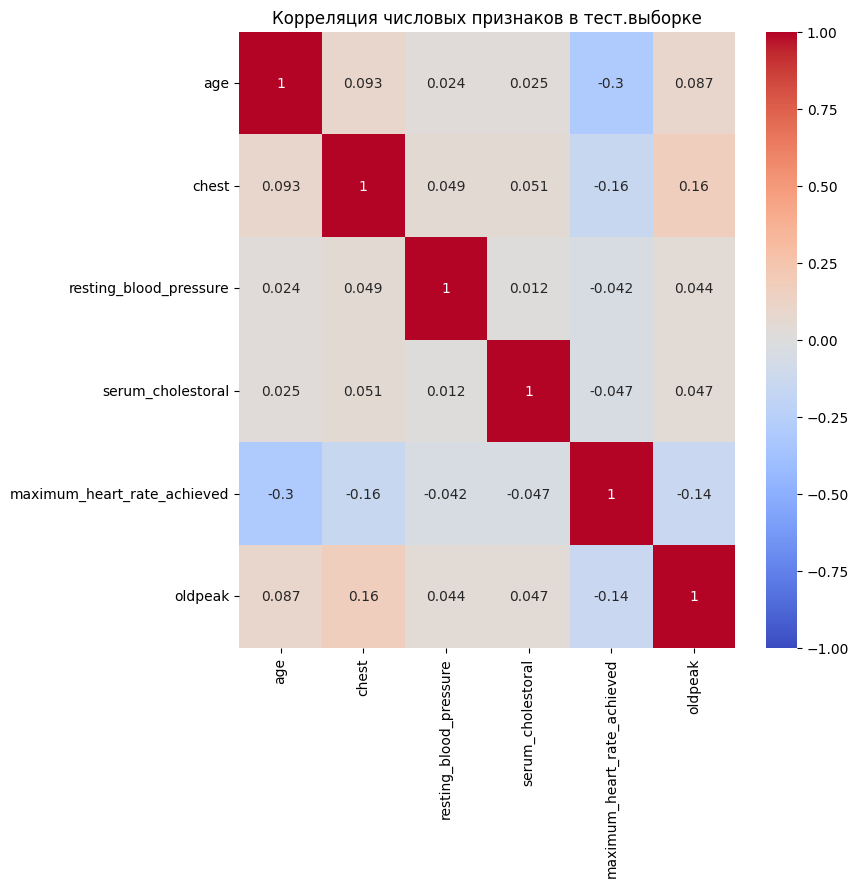

In [47]:
#Визуализируем матрицу корреляций с помощью тепловой карты. Максимальная корреляция наблюдается, как и в трен.наборе данных, между chest и oldpeak. Мультиколлинеарных признаков нет!
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix_num_test, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция числовых признаков в тест.выборке')
plt.show()

#Logistic Regression

In [48]:
#Поделим признаки на те, которые будем использовать для предсказания, и целевую перменную, которую будем предсказывать
final_train_X=train_X_final.drop('class',axis=1) #Все признаки без целевой переменной
final_train_y=train_X_final['class'] #Целевая переменная

In [49]:
from sklearn.linear_model import LogisticRegression #Импортируем необходимый класс модели из библиотеки

In [50]:
#Импорт метрик
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score)

In [51]:
model_lr=LogisticRegression(max_iter=1000, random_state=42)  #Создадим модель, max_iter для сходимости
model_lr.fit(final_train_X, final_train_y) #Обучим модель логистической регресии на тренировочной выборке
train_predictions = model_lr.predict(final_train_X) #Сначала предскажем целевую переменную на трени.выорке, чтобы оценить точность работы модели

In [52]:
#Посмотрим основные метрики
print("Accuracy:", accuracy_score(final_train_y, train_predictions)) #Точность модели составляет 88.6%. Модель правильно предсказывает класс в 88.6% случаев на данных, на которых обучалась
print("Precision:", precision_score(final_train_y, train_predictions)) #Из всех случаев, когда модель предсказала класс 1, 87.9% были верными
print("Recall:", recall_score(final_train_y, train_predictions)) #Модель находит 86.4% всех реальных случаев класса 1
print("F1-score:", f1_score(final_train_y, train_predictions)) #0.87 довольно близко к 1, что модель работает хорошо
print(classification_report(final_train_y, train_predictions)) #Разгница между классами 0 и 1 минимальна, одинаково хорошо работает для обоих классов


Accuracy: 0.8855982593175642
Precision: 0.8793498012878901
Recall: 0.864467412126342
F1-score: 0.8718451007658248
              precision    recall  f1-score   support

           0       0.89      0.90      0.90    274185
           1       0.88      0.86      0.87    224470

    accuracy                           0.89    498655
   macro avg       0.88      0.88      0.88    498655
weighted avg       0.89      0.89      0.89    498655



In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

#С помощью кросс-валидации оценим насколько хорошо модель ЛР будет работать на новых данных. Посмотрим простую кросс-валидацию для accuracy
cv_accuracy = cross_val_score(
    model_lr,
    final_train_X,
    final_train_y,
    cv=5,  # Количество фолдов
    scoring='accuracy'
)
print("Accuracy на каждом фолде:", cv_accuracy)
print("Средняя accuracy:", cv_accuracy.mean())
#Accuracy на кросс-валидации близка к Accuracy на тренировочной выборке, что свидетельствует об отсутствии переобучения

Accuracy на каждом фолде: [0.88461963 0.88484022 0.88660497 0.88518114 0.8865047 ]
Средняя accuracy: 0.8855501298492946


In [54]:
#Посмотрим на важность признаков. Наибольший вклад в предсказание вносят такие признаки, как: number_of_major_vessels_3-2.656541, number_of_major_vessels_2-2.343768, thal_7-2.175053
feature_importance = pd.DataFrame({
    'Feature': final_train_X.columns,
    'Coefficient': model_lr.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance)

                                   Feature  Coefficient
15               number_of_major_vessels_3     2.656541
14               number_of_major_vessels_2     2.343768
17                                  thal_7     2.175053
13               number_of_major_vessels_1     1.730726
10               exercise_induced_angina_1     1.465216
16                                  thal_6     1.227402
11                                 slope_2     1.070272
1                                    chest     0.826753
9   resting_electrocardiographic_results_2     0.744616
4              maximum_heart_rate_achieved    -0.739914
6                                    sex_1     0.722948
5                                  oldpeak     0.709468
8   resting_electrocardiographic_results_1     0.572925
0                                      age     0.283952
3                        serum_cholestoral     0.257279
2                   resting_blood_pressure     0.212780
12                                 slope_3     0

In [55]:
#Сделаем предсказание для тестовой выборки
test_predictions=model_lr.predict(test_X_final)
test_predictions

array([1, 1, 0, ..., 0, 0, 1])

In [56]:
#Так как в тестовом наборе данных нет целевой переменной класс, то сравним распределение предсказанных классов на тесте с распределением в тренировочных данных
#Распределение классов в трейне
train_class_dist = final_train_y.value_counts(normalize=True)
#Распределение предсказаний на тесте
test_class_dist = pd.Series(test_predictions).value_counts(normalize=True)
print("Тренировочные данные:\n", train_class_dist)
print("\nТестовые предсказания:\n", test_class_dist)
#Распределение классов в тестовых предсказаниях (56.7% класса 0 и 43.3% класса 1) достаточно близко к распределению в тренировочных данных (55.0% класса 0 и 45.0% класса 1)

Тренировочные данные:
 class
0    0.549849
1    0.450151
Name: proportion, dtype: float64

Тестовые предсказания:
 0    0.567392
1    0.432607
Name: proportion, dtype: float64


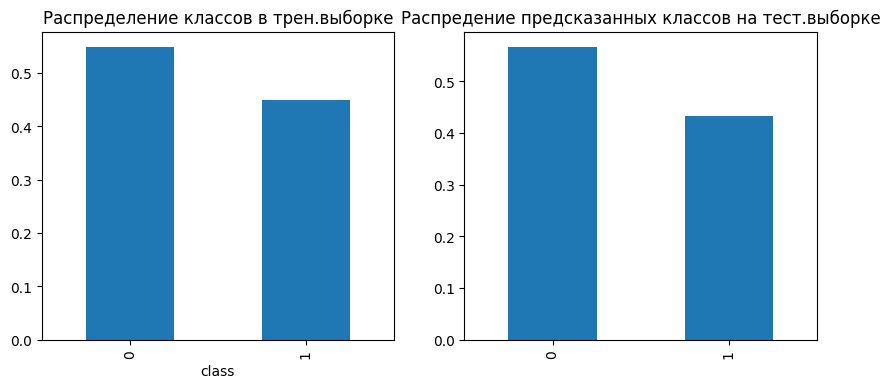

In [57]:
#Визуализируем распределение
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
train_class_dist.plot(kind='bar', title='Распределение классов в трен.выборке')
plt.subplot(1, 2, 2)
test_class_dist.plot(kind='bar', title='Распредение предсказанных классов на тест.выборке')
plt.show()

In [58]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Построение кривых обучения.

    Параметры:
    estimator : объект модели
    X : признаки
    y : целевая переменная
    cv : количество фолдов кросс-валидации
    train_sizes : доли данных для анализа
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=train_sizes, scoring='accuracy'
    )

    # Средние значения и стандартные отклонения
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Построение графиков
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    # Добавление областей стандартного отклонения
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curves")
    plt.show()

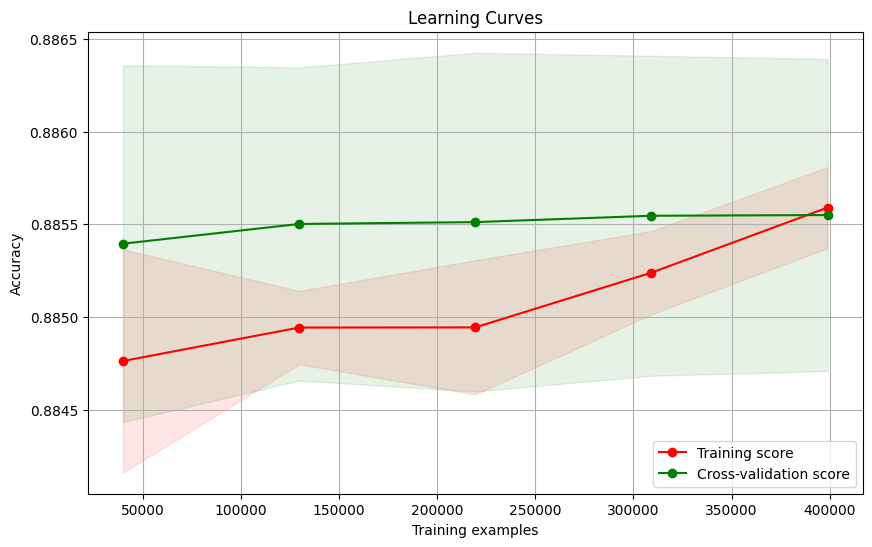

In [59]:
plot_learning_curve(model_lr, final_train_X, final_train_y)
#Обе кривые сходятся. Маленький разрыв между тренировочной и валидационной кривыми, что свидетельствует об оптимальном обучении

In [60]:
#Возможно, я не до конца поняла принцип работы с тестовой выборкой, т.к в ней отсутствует целевая переменная класс. Возможно, стоило тренировочную выборку поделить изначально на тренировочную и валидационную.

#Randomforest

In [61]:
from sklearn.ensemble import RandomForestClassifier
#Создадим модель Randomforest
model_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
model_forest.fit(final_train_X, final_train_y) #Обучим модель слйчайного леса на тренировочной выборке
train_forest_predictions = model_forest.predict(final_train_X) #Сделаем предсказание на тренировочной выборке

In [62]:
#Посмотрим основные метрики
print("Accuracy:", accuracy_score(final_train_y, train_forest_predictions)) #Точность модели составляет 86.8%. Модель правильно предсказывает класс в 86.8% случаев на данных, на которых обучалась
print("Precision:", precision_score(final_train_y, train_forest_predictions)) #Из всех случаев, когда модель предсказала класс 1, 87.1% были верными
print("Recall:", recall_score(final_train_y, train_forest_predictions)) #Модель находит 83% всех реальных случаев класса 1
print("F1-score:", f1_score(final_train_y, train_forest_predictions)) #0.85 довольно близко к 1, что модель работает хорошо
print(classification_report(final_train_y, train_forest_predictions)) #Разница между классами 0 и 1 есть в метриках recall, f1-score, т.е модель хуже предсказывает для класса 1

Accuracy: 0.8685042765037952
Precision: 0.8713617305705779
Recall: 0.8304895977190716
F1-score: 0.8504348659134922
              precision    recall  f1-score   support

           0       0.87      0.90      0.88    274185
           1       0.87      0.83      0.85    224470

    accuracy                           0.87    498655
   macro avg       0.87      0.87      0.87    498655
weighted avg       0.87      0.87      0.87    498655



In [63]:
cv_forest=cross_val_score(
    model_forest,
    final_train_X,
    final_train_y,
    cv=5,  # Количество фолдов
    scoring='accuracy'
)
print("Accuracy на каждом фолде:", cv_forest)
print("Средняя accuracy:", cv_forest.mean())
#Если accuracy на трейне сильно выше, чем на валидации — модель переобучена. В нашем случае переобучения нет, т.к качество на трейне (86.85%) и на кросс-валидации (86.78%)

Accuracy на каждом фолде: [0.86739329 0.86714261 0.86822553 0.86746348 0.86869679]
Средняя accuracy: 0.8677843398742617


Средняя accuracy у модели Logistic Regression составляет: 0.8855501298492946. Средняя accuracy у модели Random Forest без подбора параметров: 0.8677843398742617. Logistic Regression демонстрирует лучшую работу


In [64]:
#Попробуем оптимизировать модель Random Forest путем подбора гиперпараметров по сетке
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
#Создание объекта GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), # модель
    param_grid, #сетка парметров
    cv=3, #кросс-валидатор
    scoring='accuracy', #метрика
    n_jobs=-1 #используем все мощности процессора
)
grid_search.fit(final_train_X[:50000], final_train_y[:50000])  # #Обучим модель.Подвыборка для скорости
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy:", grid_search.best_score_)
best_rf = RandomForestClassifier(**grid_search.best_params_,  # Распаковываем лучшие параметры
    random_state=42,
    n_jobs=-1
) #Определяем наилучшую модель

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая accuracy: 0.8909000375134702


In [65]:
best_rf.fit(final_train_X, final_train_y) #Обучаем наилучшую модель
best_forest_train_predictions = best_rf.predict(final_train_X) #Делаем предсказания на трени.выборке
print("Accuracy на тренировочных данных:", accuracy_score(final_train_y, best_forest_train_predictions))

Accuracy на тренировочных данных: 0.8948752143265384


Accuracy у модели Random Forest без подбора параметров: 0.8677843398742617. Accuracy у модели Random Forest c подбором параметров: 0.8948752143265384, что намного лучше

In [66]:
#Проверим наилучшую модель на кросс-валидации. Разница между трейном и CV ~0.28%, переобучения нет
cv_best_forest=cross_val_score(
    best_rf,
    final_train_X,
    final_train_y,
    cv=5,  # Количество фолдов
    scoring='accuracy'
)
print("Accuracy на каждом фолде:", cv_best_forest)
print("Средняя accuracy:", cv_best_forest.mean())

Accuracy на каждом фолде: [0.89128756 0.89191926 0.89245069 0.89257102 0.89213986]
Средняя accuracy: 0.8920736781943429


In [67]:
test_predictions_fr = best_rf.predict(test_X_final) #Делаем предсказания на тест.выборке
test_predictions_fr

array([1, 1, 0, ..., 0, 0, 1])

In [68]:
#Посмотрим на важность признаков. Наиболее значимые признаки- thal_7(обратимый дефект), chest(боль в груди), exercise_induced_angina_1(стенокардия при нагрузке)
importances_rf = best_rf.feature_importances_
pd.DataFrame({'Feature': final_train_X.columns, 'Importance': importances_rf}).sort_values('Importance', ascending=False)


,Feature,Importance
17,thal_7,0.245191
1,chest,0.201334
10,exercise_induced_angina_1,0.122003
5,oldpeak,0.098761
4,maximum_heart_rate_achieved,0.093021
11,slope_2,0.053497
14,number_of_major_vessels_2,0.037978
6,sex_1,0.035285
0,age,0.032937
13,number_of_major_vessels_1,0.027580


In [69]:
#Распределение классов в тренировочных данных
train_dist = final_train_y.value_counts(normalize=True)
#Распределение предсказанных классов на тесте
test_dist = pd.Series(test_predictions_fr).value_counts(normalize=True)  # Исправлено на test_predictions_fr
print("Тренировочные данные (реальные классы):\n", train_dist)
print("\nТестовые предсказания:\n", test_dist)
#Распределение классов в тестовых предсказаниях достаточно близко к распределению в тренировочных данных

Тренировочные данные (реальные классы):
 class
0    0.549849
1    0.450151
Name: proportion, dtype: float64

Тестовые предсказания:
 0    0.567813
1    0.432188
Name: proportion, dtype: float64


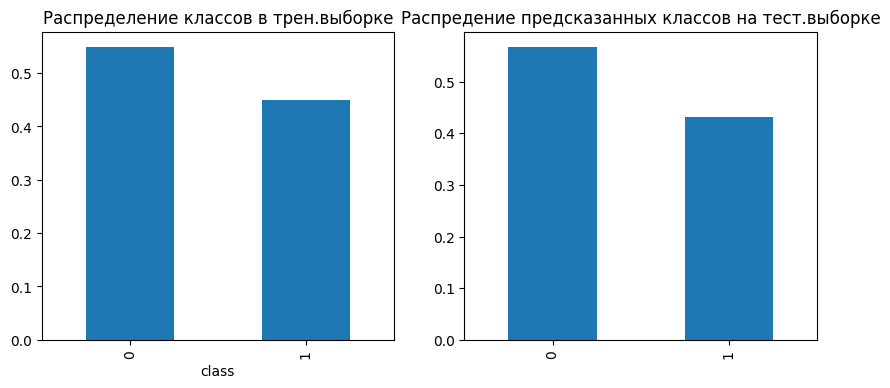

In [70]:
#Визуализируем распределение
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
train_dist.plot(kind='bar', title='Распределение классов в трен.выборке')
plt.subplot(1, 2, 2)
test_dist.plot(kind='bar', title='Распредение предсказанных классов на тест.выборке')
plt.show()

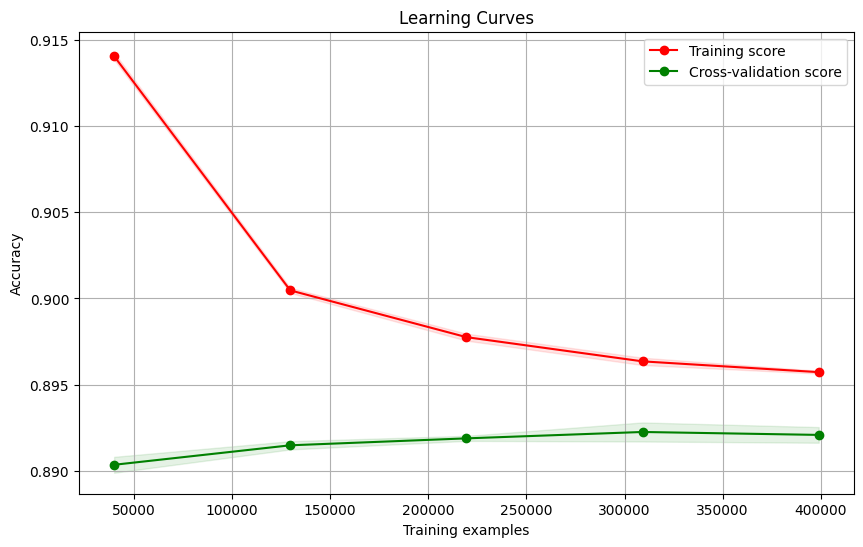

In [71]:
plot_learning_curve(best_rf, final_train_X, final_train_y)
#Обе кривые сходятся. Переобучения нет

#Модель полносвязной глубокой нейронной сети

In [72]:
from sklearn.model_selection import train_test_split
#Разделяем тренировочные данные на Train (80%) и Validation (20%)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(final_train_X, final_train_y, test_size=0.2, random_state=42)
print(f"Train: {X_train_n.shape}, {y_train_n.shape}")
print(f"Val: {X_val_n.shape}, {y_val_n.shape}")

Train: (398924, 18), (398924,)
Val: (99731, 18), (99731,)


In [73]:
X_train_n = X_train_n.astype(np.float64)
X_val_n = X_val_n.astype(np.float64)
test_X_final = test_X_final.astype(np.float64)

In [74]:
import torch
#Конвертация в тензоры
X_train_tensor = torch.FloatTensor(X_train_n.values)  # Используем .values для DataFrame
y_train_tensor = torch.FloatTensor(y_train_n.values).view(-1, 1)  # Для BCELoss
X_val_tensor = torch.FloatTensor(X_val_n.values)
y_val_tensor = torch.FloatTensor(y_val_n.values).view(-1, 1)

# Тестовые данные (без 'class')
X_test_tensor = torch.FloatTensor(test_X_final.values)

In [75]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        # Слой 1: входной,скрытый 64 нейрона
        self.fc1 = nn.Linear(input_size, 64)
        # Слой 2: скрытый,выходной 1 нейрон
        self.fc2 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.5) #Регуляризация
        self.bn1 = nn.BatchNorm1d(64) #Нормализация данных

    def forward(self, x):
        #Прямой проход
        x = F.relu(self.fc1(x)) #Активация
        x = self.bn1(x) #Batch Normalization
        x = self.dropout(x) #Dropout

        x = torch.sigmoid(self.fc2(x))  #Выход 0, 1
        return x


In [76]:
#Инициализация модели
input_size = X_train_tensor.shape[1]  # Число признаков
model = BinaryClassifier(input_size)
print(model)

BinaryClassifier(
  (fc1): Linear(in_features=18, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [77]:
#Инициализация функции потерь и оптимизатора
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # Оптимизатор Adam

In [ ]:
epochs = 50
train_losses = []
val_losses = []
val_accuracies = []

# Инициализируем переменные для хранения лучшей модели
best_model_state = None
best_val_loss = float('inf')

for epoch in range(epochs):
    #Обучение
    model.train()
    optimizer.zero_grad()
    #Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    #Backward pass
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Валидация
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        # Accuracy
        preds = (val_outputs > 0.5).float()
        val_acc = (preds == y_val_tensor).float().mean()
        val_accuracies.append(val_acc.item())

        # Сохраняем лучшую модель
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()

# Восстанавливаем лучшую модель
model.load_state_dict(best_model_state)

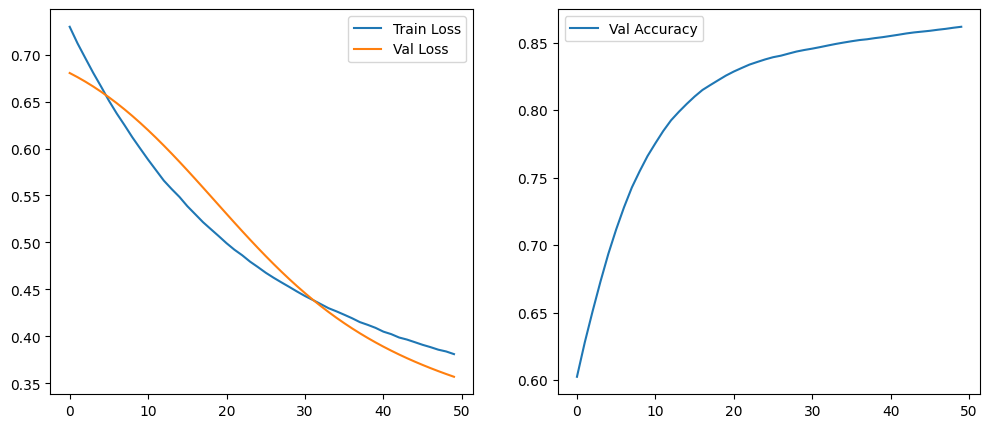

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.legend()
plt.show()

In [ ]:
#Посмотрим финальные метрики
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Val Loss: {val_losses[-1]:.4f}")
print(f"Final Val Accuracy: {val_accuracies[-1]:.4f}")

#Сделаем предсказание
model.eval()
with torch.no_grad():
    test_probs = model(X_test_tensor)
    test_preds = (model(X_test_tensor) > 0.5).float()

test_preds

Модель не переобучается (валидационные метрики лучше тренировочных, т.к Val loss меньше Train loss). Но Accuracy у модели Random Forest c подбором параметров: 0.8948752143265384, у нейронной сети Final Val Accuracy: 0.8869, что немного хуже.

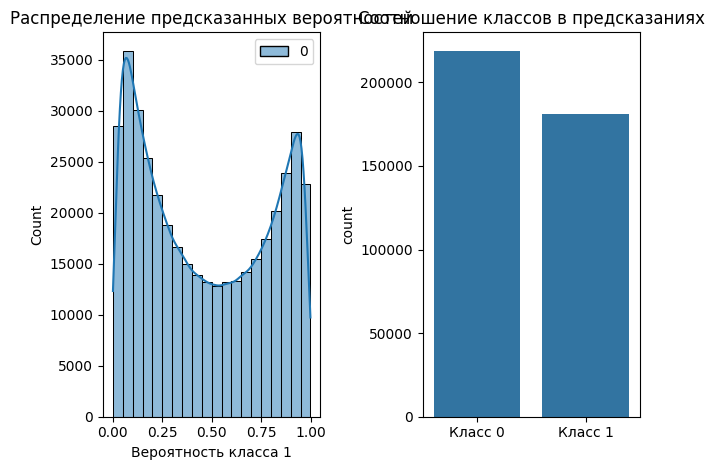

In [81]:
#Распределение вероятностей
plt.subplot(1, 2, 1)
sns.histplot(test_probs.numpy(), bins=20, kde=True)
plt.title('Распределение предсказанных вероятностей')
plt.xlabel('Вероятность класса 1')

#Соотношение классов
plt.subplot(1, 2, 2)
sns.countplot(x=test_preds.numpy().flatten())
plt.title('Соотношение классов в предсказаниях')
plt.xticks([0, 1], ['Класс 0', 'Класс 1'])

plt.tight_layout()
plt.show()

При анализе предсказаний, сделанных на тестовых данных, отмечается больше предсказаний с классом 0, т.е отсутствие сердечно-сосудистого заболевания